<a href="https://colab.research.google.com/github/ayamlearning/machine-learning-zoomcamp/blob/main/California_Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

## Dataset

In [118]:
data = 'wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'

In [119]:
!wget $data

--2023-09-23 15:48:49--  http://wget/
Resolving wget (wget)... failed: Name or service not known.
wget: unable to resolve host address ‘wget’
--2023-09-23 15:48:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.2’

housing.csv.2       100%[===================>]   1.36M  --.-KB/s    in 0.05s   

2023-09-23 15:48:49 (26.8 MB/s) - ‘housing.csv.2’ saved [1423529/1423529]

FINISHED --2023-09-23 15:48:49--
Total wall clock time: 0.4s
Downloaded: 1 files, 1.4M in 0.05s (26.8 MB/s)


## EDA

In [120]:
df = pd.read_csv('housing.csv')
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3955,-118.62,34.20,32.0,3233.0,553.0,1678.0,545.0,5.0025,234900.0,<1H OCEAN
796,-122.08,37.63,31.0,767.0,171.0,548.0,185.0,3.7614,176000.0,NEAR BAY
19734,-122.17,40.20,28.0,1782.0,334.0,873.0,311.0,3.3594,79100.0,INLAND
10147,-117.92,33.91,33.0,2868.0,382.0,1204.0,412.0,6.1825,336900.0,<1H OCEAN
19836,-119.40,36.53,28.0,2201.0,429.0,1524.0,412.0,2.7500,65000.0,INLAND


In [121]:
df.shape

(20640, 10)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [123]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [124]:
df['ocean_proximity']=df['ocean_proximity'].str.lower().str.replace(' ', '_')

In [125]:
df['ocean_proximity'].unique()

array(['near_bay', '<1h_ocean', 'inland', 'near_ocean', 'island'],
      dtype=object)

In [126]:
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['ocean_proximity']

In [127]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

Distribution of the median house value

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='median_house_value', ylabel='Count'>

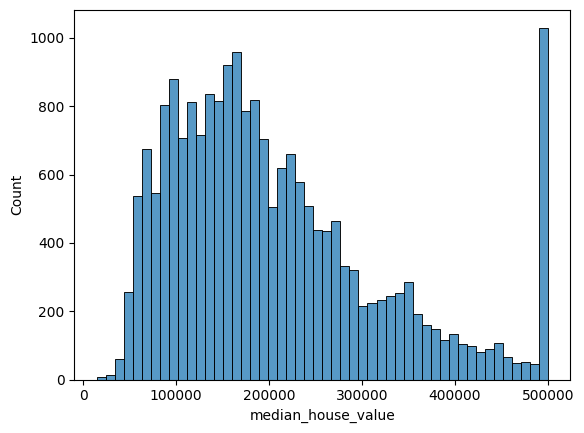

In [129]:
sns.histplot(df.median_house_value, bins=50)

<Axes: xlabel='median_house_value', ylabel='Count'>

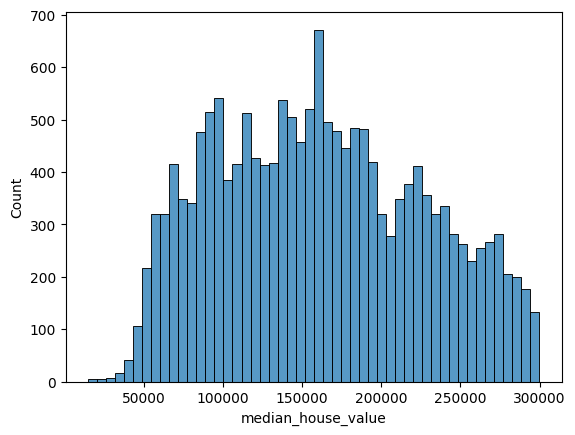

In [130]:
sns.histplot(df.median_house_value[df.median_house_value < 300000], bins=50)

## Preparing the dataset

In [131]:
df= df.query("ocean_proximity == '<1h_ocean' | ocean_proximity == 'inland'")
df.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18116,-122.02,37.30,32.0,2134.0,328.0,903.0,322.0,6.3590,341900.0,<1h_ocean
11106,-117.90,33.85,31.0,3413.0,764.0,2326.0,728.0,4.3250,187100.0,<1h_ocean
11116,-117.87,33.84,25.0,1928.0,414.0,961.0,385.0,4.0724,231400.0,<1h_ocean
7049,-118.04,33.93,36.0,1045.0,239.0,1165.0,230.0,3.1979,161800.0,<1h_ocean
5193,-118.25,33.93,42.0,657.0,147.0,526.0,132.0,2.5000,110200.0,<1h_ocean


In [132]:
df.shape

(15687, 10)

In [133]:
columns = ['latitude','longitude','housing_median_age','total_rooms',
           'total_bedrooms','population','households','median_income',
           'median_house_value']

df = df[columns]
df.sample(5)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
3122,35.35,-117.84,28.0,1913.0,486.0,858.0,371.0,1.9962,50800.0
10923,33.73,-117.88,33.0,2291.0,594.0,3232.0,589.0,3.2037,163500.0
10219,33.89,-117.88,16.0,959.0,176.0,353.0,185.0,4.5000,173300.0
17769,37.35,-121.84,20.0,3375.0,867.0,4610.0,860.0,2.6894,182200.0
3982,34.19,-118.63,32.0,3568.0,591.0,1741.0,563.0,5.1529,259600.0


In [134]:
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [135]:
df.quantile(.5)

latitude                  34.1600
longitude               -118.3700
housing_median_age        27.0000
total_rooms             2118.0000
total_bedrooms           432.0000
population              1195.0000
households               406.0000
median_income              3.4688
median_house_value    166900.0000
Name: 0.5, dtype: float64

## Prepare and split the dataset

In [136]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

n, n_val, n_test, n_train

(15687, 3137, 3137, 9413)

In [137]:
idx = np.arange(n)

np.random.seed(42)
np.random.shuffle(idx)

In [138]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [139]:
df_train.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0


In [140]:
len(df_train), len(df_val), len(df_test)

(9413, 3137, 3137)

In [141]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [142]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [143]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Models

In [77]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [175]:
def prepare_X(df,null_val=0):
    df_num = df[base]
    df_num = df_num.fillna(null_val)
    X = df_num.values
    return X

In [176]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [177]:
def train_linear_regression_reg(X, y, r=0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

## Housing price baseline model

In [178]:
base = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']

##### Model 1 (With 0  for nulls)

In [181]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

##### Model 2 (With median  for nulls)

In [206]:
mean = X_train[:,4].mean()
mean

534.175077021141

In [182]:
X_train = prepare_X(df_train,mean)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val,mean)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred),2)

0.34

## Optimizing Housing price baseline model with regularisation

In [191]:
scores = []

for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    scores.append(score)

    print(r,"===> RMSE:", score)

print()
print(min(scores))

0 ===> RMSE: 0.3408479034165885
1e-06 ===> RMSE: 0.3408479061792101
0.0001 ===> RMSE: 0.340848180054261
0.001 ===> RMSE: 0.3408506921851553
0.01 ===> RMSE: 0.340877930047517
0.1 ===> RMSE: 0.3412862041996248
1 ===> RMSE: 0.34489583276425
5 ===> RMSE: 0.34773980704788987
10 ===> RMSE: 0.3483149833520978

0.3408479034165885


## Optimizing Housing price baseline model with seed

In [195]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
results = {}

for s in seeds:
    idx = np.arange(n)

    np.random.seed(s)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    print(s,"==> RMSE:",round(rmse(y_val, y_pred),2))
    results[s]=rmse(y_val, y_pred)

0 ==> RMSE: 0.34
1 ==> RMSE: 0.34
2 ==> RMSE: 0.34
3 ==> RMSE: 0.33
4 ==> RMSE: 0.34
5 ==> RMSE: 0.34
6 ==> RMSE: 0.34
7 ==> RMSE: 0.35
8 ==> RMSE: 0.35
9 ==> RMSE: 0.33


In [204]:
std= np.std(list(results.values()))
print(round(std,3))

0.005


In [207]:
idx = np.arange(n)

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
round(score,2)


0.33